In [146]:
from scipy.sparse import load_npz
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, classification_report

# Data Manipulation
import re ## regular expression operator
import numpy as np
import pandas as pd
import string 


# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Methods and stopwords text processing
import nltk ## natural language toolkit
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer


# Machine Learning Libraries
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split




#Load csv files
DATASET_ENCODING = "ISO-8859-1"
y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
X_train = pd.read_csv('X_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]

X_train.fillna('', inplace=True)
X_test.fillna('', inplace=True)



C:\Users\Thamires\AppData\Local\Temp\ipykernel_10312\2801519767.py:51: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_train = pd.read_csv('y_train.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_10312\2801519767.py:52: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  y_test = pd.read_csv('y_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_10312\2801519767.py:53: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  X_test = pd.read_csv('X_test.csv', squeeze=True, encoding=DATASET_ENCODING)[:-1]
C:\Users\Thamires\AppData\Local\Temp\ipykernel_10312\2801519767.py:54: FutureWarning: 

In [147]:
# # vectorize the text data
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectorizer.fit(X_train)
print('Vectorizer fitted.')
print('No. of feature_words: ', len(vectorizer.get_feature_names_out()))

# # transform the text data into a sparse matrix
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# save it into sparse matrix format
# save_npz('X_train.npz', X_train_vec) #model do save sparse matrix
# save_npz('X_test.npz', X_test_vec)

Vectorizer fitted.
No. of feature_words:  248706


In [148]:
# Evaluate Model Function

def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test_vec)

    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    categories  = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]

    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                xticklabels = categories, yticklabels = categories)

    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       983
           4       0.77      0.74      0.76      1016

    accuracy                           0.76      1999
   macro avg       0.76      0.76      0.76      1999
weighted avg       0.76      0.76      0.76      1999



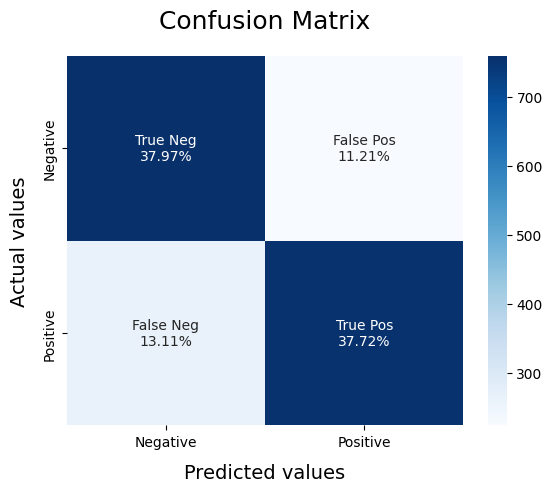

In [149]:
BNBmodel = BernoulliNB(alpha = 2)
BNBmodel.fit(X_train_vec, y_train)
model_Evaluate(BNBmodel)

In [ ]:
## PROBLEMA

A função bernouill.fit pede uma matriz sparsa e um array n shape. X_train é uma matriz sparsa, porém de 6 samples enquanto y_train tem 38001, não consigo entender como fazer os 2 conversarem nesse caso pra fazer esse código rodar.